![Alt Text](image/hdfc.PNG)

In [3]:
import pandas as pd # reading the data and making it to the pandas dataframe
df = pd.read_csv(r'D:\Information Technology\BSE HDFC stock data analysis\HDFC stocks raw data.csv')
print(df.head())

           Date  Open Price  High Price  Low Price  Close Price          WAP  \
0  8-April-2025     1764.10     1782.00    1750.60      1769.10  1768.287669   
1  7-April-2025     1760.00     1779.60    1738.05      1758.15  1753.573781   
2  4-April-2025     1808.00     1842.20    1807.95      1817.00  1825.720749   
3  3-April-2025     1779.05     1803.85    1776.70      1793.70  1794.324004   
4  2-April-2025     1767.30     1799.30    1767.30      1797.40  1790.067800   

   No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0        507374          15461          8.971832e+08              215479.0   
1        784420          11475          1.375538e+09              648000.0   
2        262330          11728          4.789413e+08              107297.0   
3        219013           9740          3.929803e+08              127132.0   
4        119365           4904          2.136714e+08               47555.0   

   % Deli. Qty to Traded Qty  Spread High-Low  Spr

In [5]:
df.columns # printing all column name here

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')

In [7]:
df.info() # checking information about the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4967 non-null   object 
 1   Open Price                 4967 non-null   float64
 2   High Price                 4967 non-null   float64
 3   Low Price                  4967 non-null   float64
 4   Close Price                4967 non-null   float64
 5   WAP                        4967 non-null   float64
 6   No.of Shares               4967 non-null   int64  
 7   No. of Trades              4967 non-null   int64  
 8   Total Turnover (Rs.)       4967 non-null   float64
 9   Deliverable Quantity       4956 non-null   float64
 10  % Deli. Qty to Traded Qty  4956 non-null   float64
 11  Spread High-Low            4967 non-null   float64
 12  Spread Close-Open          4967 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [9]:
df['Date'] = pd.to_datetime(df['Date']) # converting the date column into datetime
print(df.dtypes)

Date                         datetime64[ns]
Open Price                          float64
High Price                          float64
Low Price                           float64
Close Price                         float64
WAP                                 float64
No.of Shares                          int64
No. of Trades                         int64
Total Turnover (Rs.)                float64
Deliverable Quantity                float64
% Deli. Qty to Traded Qty           float64
Spread High-Low                     float64
Spread Close-Open                   float64
dtype: object


### Here we are understanding the data structure

In [12]:
# Get the difference between dates,
df = df.sort_values('Date')  # Ensure sorted
df['Date_Diff'] = df['Date'].diff()

# Unique date differences
print(df['Date_Diff'].value_counts())

Date_Diff
1 days    3775
3 days     919
2 days     160
4 days     101
5 days      10
6 days       1
Name: count, dtype: int64


In [14]:
# Filter rows with gaps > 1 day
gaps = df[df['Date_Diff'] > pd.Timedelta(days=1)]
print(gaps[['Date', 'Date_Diff']].head(20))

           Date Date_Diff
4965 2005-04-04    3 days
4960 2005-04-11    3 days
4957 2005-04-15    2 days
4956 2005-04-18    3 days
4951 2005-04-25    3 days
4946 2005-05-02    3 days
4941 2005-05-09    3 days
4936 2005-05-16    3 days
4931 2005-05-23    3 days
4926 2005-05-30    3 days
4920 2005-06-06    2 days
4915 2005-06-13    3 days
4910 2005-06-20    3 days
4905 2005-06-27    3 days
4900 2005-07-04    3 days
4895 2005-07-11    3 days
4890 2005-07-18    3 days
4885 2005-07-25    3 days
4882 2005-07-29    2 days
4881 2005-08-01    3 days


In [16]:
# Create complete date range from start to end
full_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='B')  # 'B' = business days

# Find missing business days
missing_dates = full_range.difference(df['Date'])
print("Missing Dates:", missing_dates)

Missing Dates: DatetimeIndex(['2005-04-14', '2005-07-28', '2005-08-15', '2005-09-07',
               '2005-10-12', '2005-11-03', '2005-11-04', '2005-11-15',
               '2006-01-11', '2006-01-26',
               ...
               '2024-06-17', '2024-07-17', '2024-08-15', '2024-10-02',
               '2024-11-15', '2024-11-20', '2024-12-25', '2025-02-26',
               '2025-03-14', '2025-03-31'],
              dtype='datetime64[ns]', length=280, freq=None)


In [18]:
duplicates = df[df.duplicated('Date')]
print("Duplicate dates:\n", duplicates)

Duplicate dates:
 Empty DataFrame
Columns: [Date, Open Price, High Price, Low Price, Close Price, WAP, No.of Shares, No. of Trades, Total Turnover (Rs.), Deliverable Quantity, % Deli. Qty to Traded Qty, Spread High-Low, Spread Close-Open, Date_Diff]
Index: []


### now we are doing little discriptive analysis

In [21]:
# Basic numeric summary
columns_to_check = ['Open Price', 'Close Price', 'No.of Shares', '% Deli. Qty to Traded Qty', 'Spread High-Low']

# Summary statistics
df[columns_to_check].describe()

,Open Price,Close Price,No.of Shares,% Deli. Qty to Traded Qty,Spread High-Low
count,4967.000000,4967.000000,4.967000e+03,4956.000000,4967.000000
mean,1309.820455,1309.044272,2.568132e+05,45.170192,29.729092
std,512.573800,512.515953,5.170399e+05,18.127375,21.977941
min,405.900000,406.050000,1.687000e+03,0.270000,2.950000
25%,895.000000,893.100000,6.778100e+04,31.980000,15.900000
50%,1290.750000,1289.450000,1.299040e+05,43.010000,23.650000
75%,1653.000000,1653.900000,2.697310e+05,56.362500,36.575000
max,2564.000000,2564.950000,1.379186e+07,99.450000,288.000000


In [47]:
# Coefficient of Variation (CV) = std / mean

cv_open_price = 512.573800 / 1309.820455
print(cv_open_price)

cv_Close_Price = 512.515953 / 1309.044272
print(cv_Close_Price)

No_of_Shares = 5.170399 / 2.568132
print(No_of_Shares)
# cv_volume = 1500000 / 2000000 = 0.75 → 75%

0.39133134472235737
0.3915191899636531
2.0132917622614412


## Interpretation Guide
### CV Range	|Interpretation
### < 0.1 (10%)	|Low volatility (very stable)
### 0.1 – 0.3	|Moderate volatility
### > 0.3 (30%+)|	High volatility (widely spread values)

In [49]:
df[['No.of Shares', 'Spread High-Low']].describe()

,No.of Shares,Spread High-Low
count,4.967000e+03,4967.000000
mean,2.568132e+05,29.729092
std,5.170399e+05,21.977941
min,1.687000e+03,2.950000
25%,6.778100e+04,15.900000
50%,1.299040e+05,23.650000
75%,2.697310e+05,36.575000
max,1.379186e+07,288.000000


In [51]:
df['Spread High-Low'].value_counts(bins=10).sort_index() # here we can see the clear out-lires

(2.664, 31.455]      3348
(31.455, 59.96]      1217
(59.96, 88.465]       290
(88.465, 116.97]       69
(116.97, 145.475]      28
(145.475, 173.98]       6
(173.98, 202.485]       4
(202.485, 230.99]       2
(230.99, 259.495]       1
(259.495, 288.0]        2
Name: count, dtype: int64

In [ ]:
# now we can consider as the data is less volatile in nature

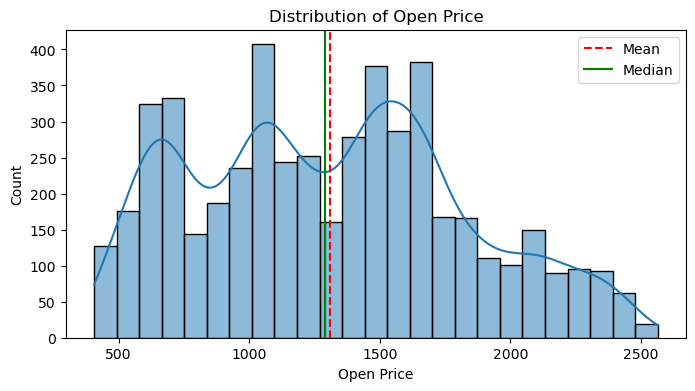

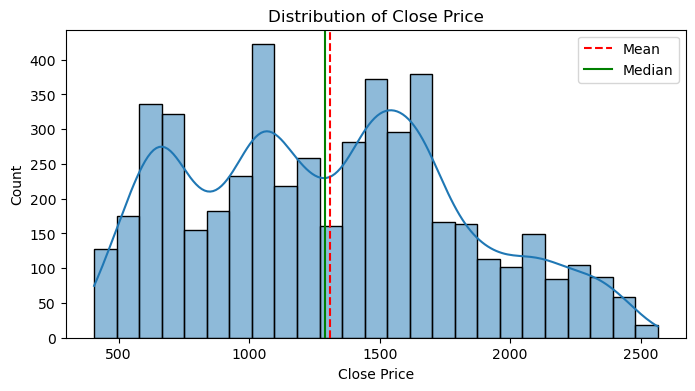

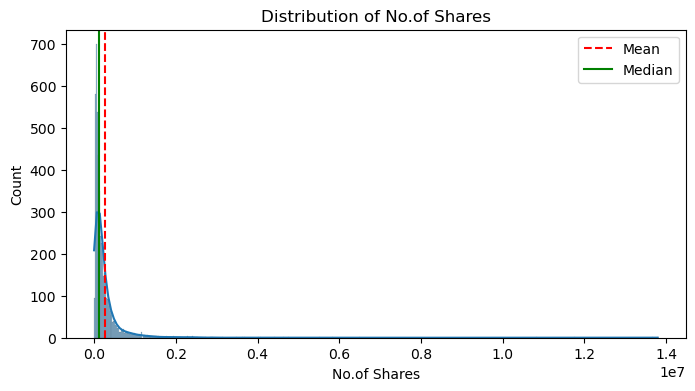

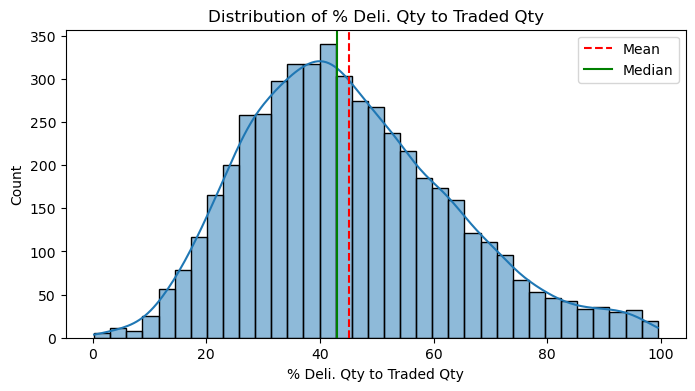

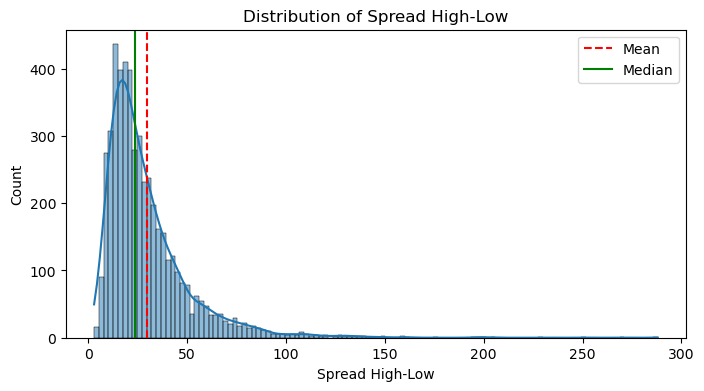

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# cols = ['Open Price', 'Close Price', 'No.of Shares', '% Deli. Qty to Traded Qty', 'Spread High-Low']

for col in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='-', label='Median')
    plt.title(f'Distribution of {col}')o
    plt.legend()
    plt.show()


In [24]:
from scipy.stats import skew # scipy is scientific python

df['No.of Shares'].skew()

# Positive value → right skewed, output is positive value so the data is right skewed data
# Negative value → left skewed
# mean > median, it will be right skewed data and vise-versa

13.378055397238121

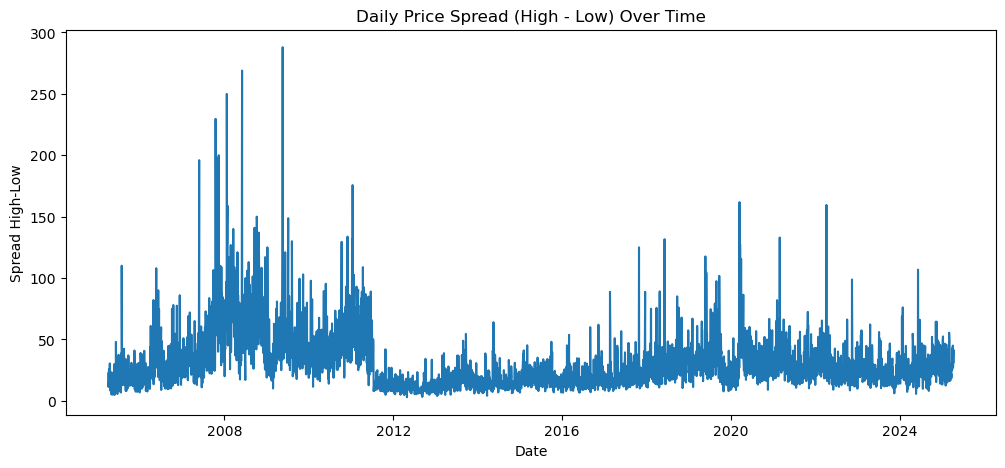

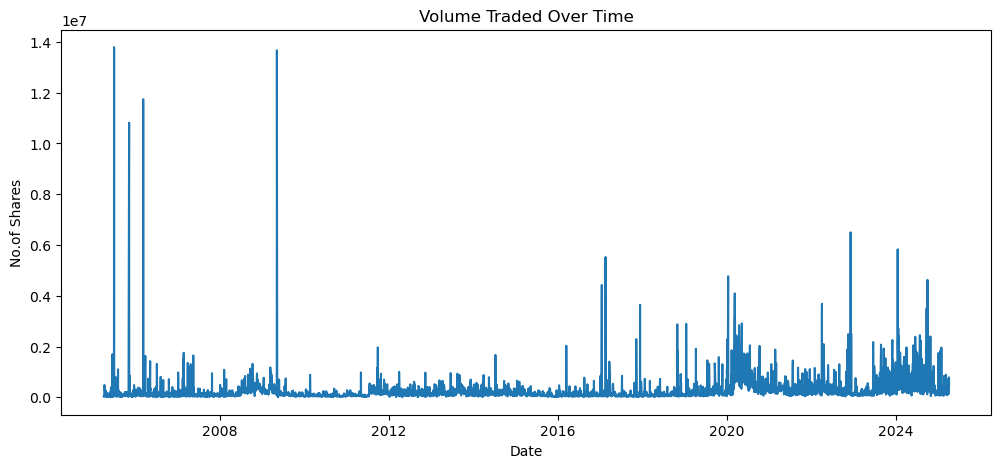

In [26]:
# Convert date if not already
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='Spread High-Low', data=df)
plt.title('Daily Price Spread (High - Low) Over Time')
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='No.of Shares', data=df)
plt.title('Volume Traded Over Time')
plt.show()

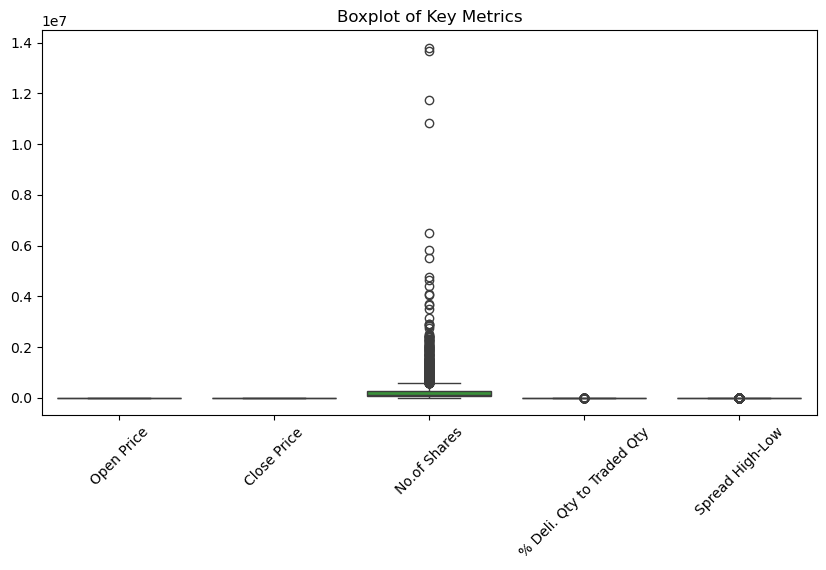

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[columns_to_check])
plt.title('Boxplot of Key Metrics')
plt.xticks(rotation=45)
plt.show()

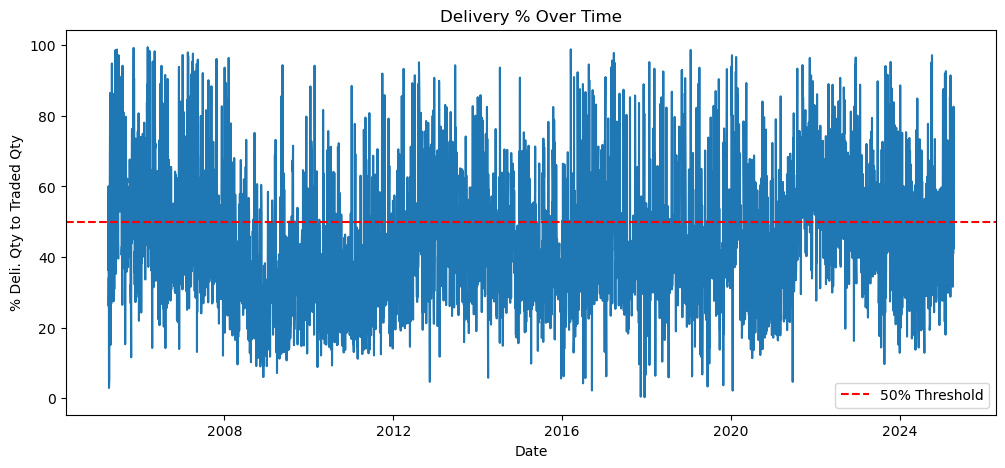

In [32]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='% Deli. Qty to Traded Qty', data=df)
plt.axhline(50, color='red', linestyle='--', label='50% Threshold')
plt.title('Delivery % Over Time')
plt.legend()
plt.show()

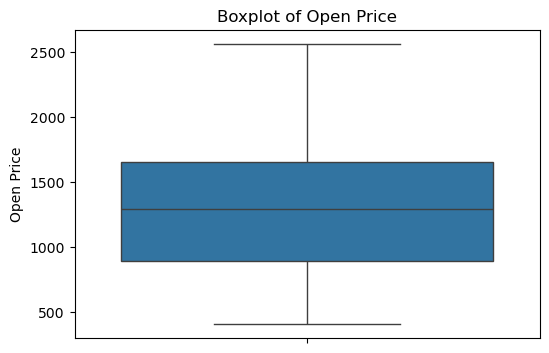

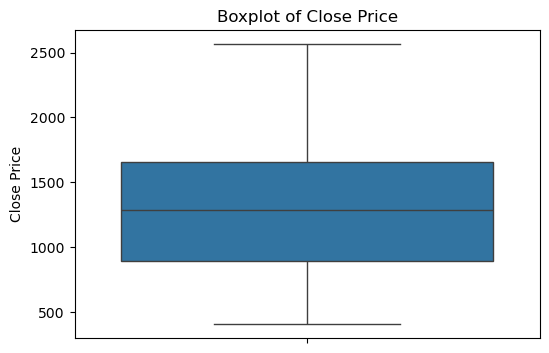

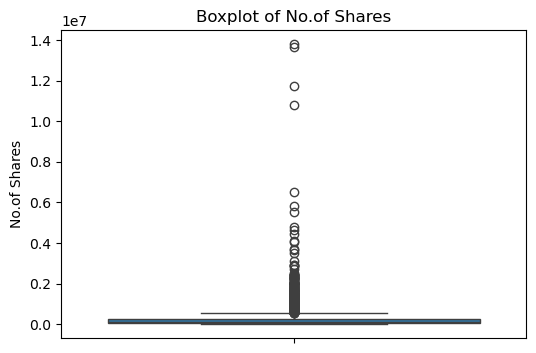

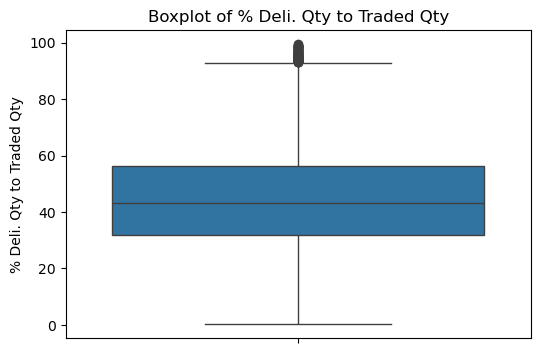

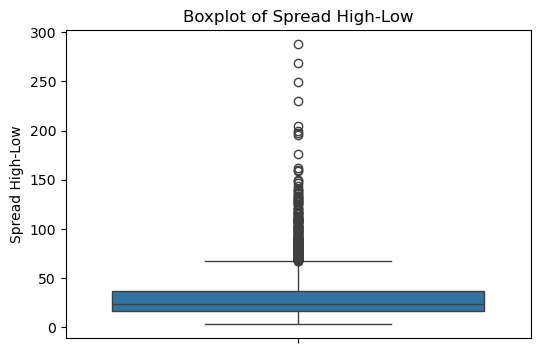

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Open Price', 'Close Price', 'No.of Shares', '% Deli. Qty to Traded Qty', 'Spread High-Low']

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [53]:
df['No.of Shares'].value_counts(bins=10).sort_index()

(-12103.17, 1380703.9]      4867
(1380703.9, 2759720.8]        80
(2759720.8, 4138737.7]        10
(4138737.7, 5517754.6]         3
(5517754.6, 6896771.5]         3
(6896771.5, 8275788.4]         0
(8275788.4, 9654805.3]         0
(9654805.3, 11033822.2]        1
(11033822.2, 12412839.1]       1
(12412839.1, 13791856.0]       2
Name: count, dtype: int64

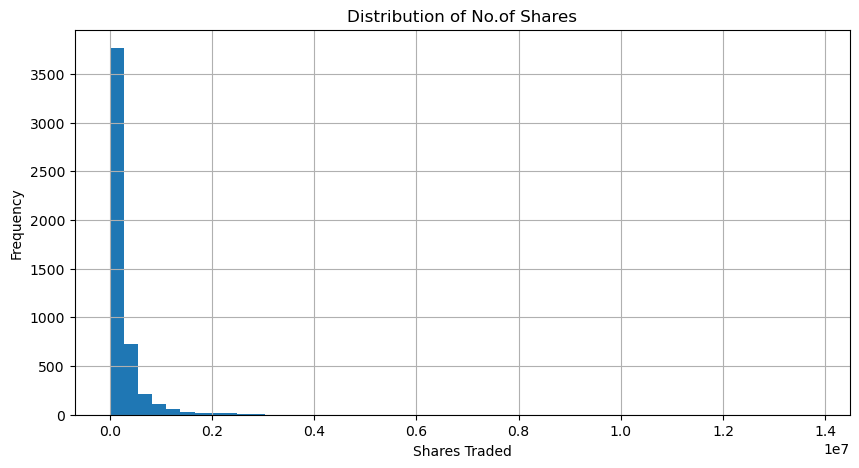

In [55]:
import matplotlib.pyplot as plt # ploting histogram to understande the distribution of the data

plt.figure(figsize=(10,5))
df['No.of Shares'].hist(bins=50)
plt.title('Distribution of No.of Shares')
plt.xlabel('Shares Traded')
plt.ylabel('Frequency')
plt.show()

# It is heavely right skewed data

In [61]:
# checking the correlations here
numeric_df = df.select_dtypes(include='number') # select only numaric colums
correlation_matrix = numeric_df.corr()
print(correlation_matrix) # printing the corelation matrics

                           Open Price  High Price  Low Price  Close Price  \
Open Price                   1.000000    0.999533   0.999441     0.999165   
High Price                   0.999533    1.000000   0.999174     0.999601   
Low Price                    0.999441    0.999174   1.000000     0.999539   
Close Price                  0.999165    0.999601   0.999539     1.000000   
WAP                          0.999517    0.999738   0.999735     0.999850   
No.of Shares                -0.036759   -0.034064  -0.038417    -0.036049   
No. of Trades                0.079624    0.083303   0.077202     0.080039   
Total Turnover (Rs.)         0.116185    0.118724   0.115009     0.116937   
Deliverable Quantity        -0.036572   -0.035112  -0.037371    -0.036030   
% Deli. Qty to Traded Qty   -0.110607   -0.112181  -0.107001    -0.109472   
Spread High-Low              0.321278    0.338415   0.299904     0.320596   
Spread Close-Open           -0.023199   -0.001100  -0.000357     0.017679   

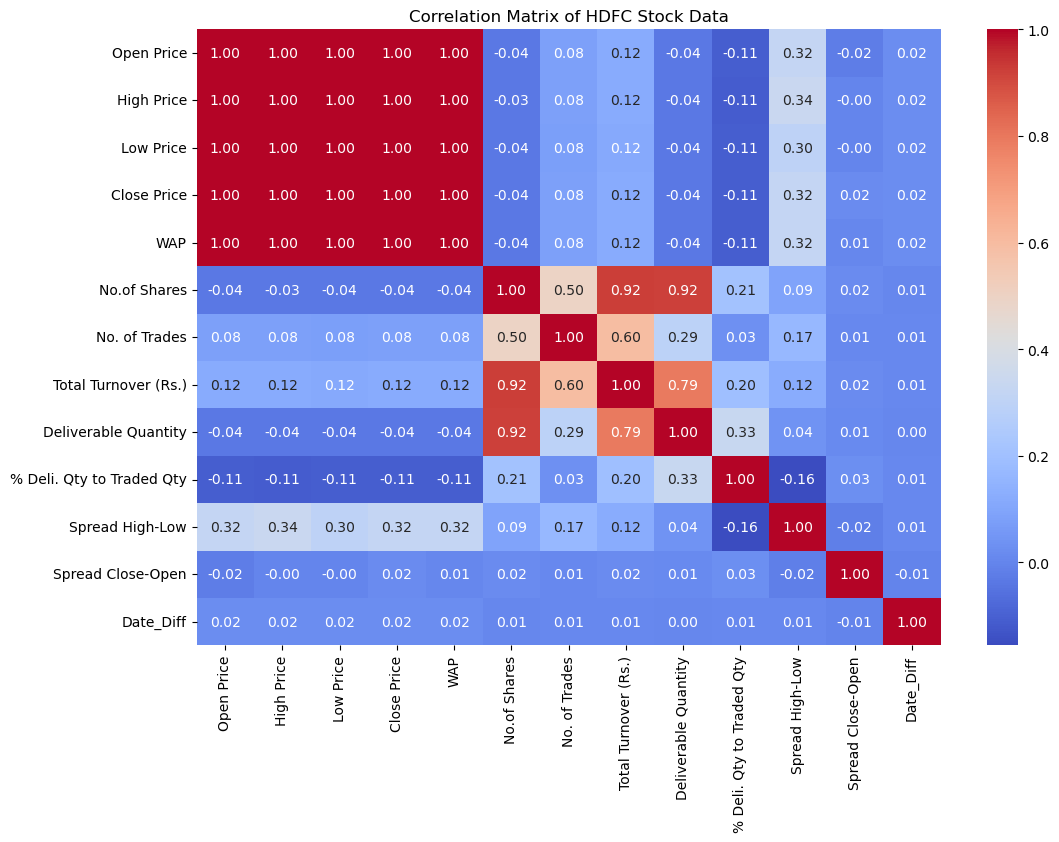

In [63]:
import seaborn as sns # checking the correlation with headmap
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of HDFC Stock Data')
plt.show()

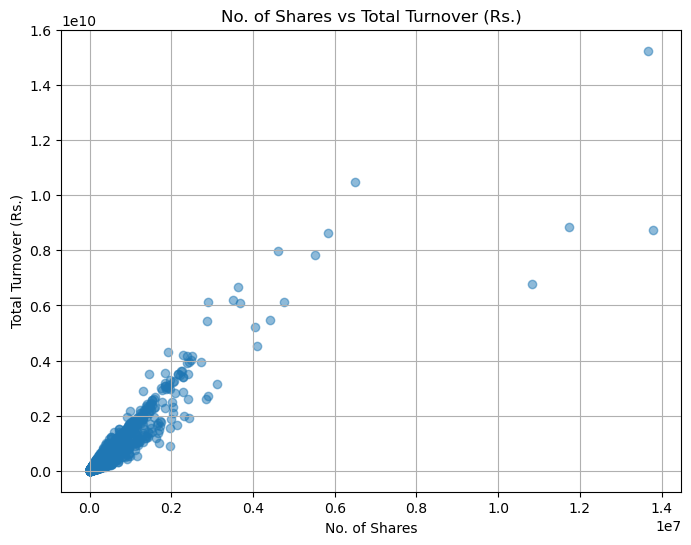

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['No.of Shares'], df['Total Turnover (Rs.)'], alpha=0.5)
plt.title('No. of Shares vs Total Turnover (Rs.)')
plt.xlabel('No. of Shares')
plt.ylabel('Total Turnover (Rs.)')
plt.grid(True)
plt.show()

# looks like a positive correlations

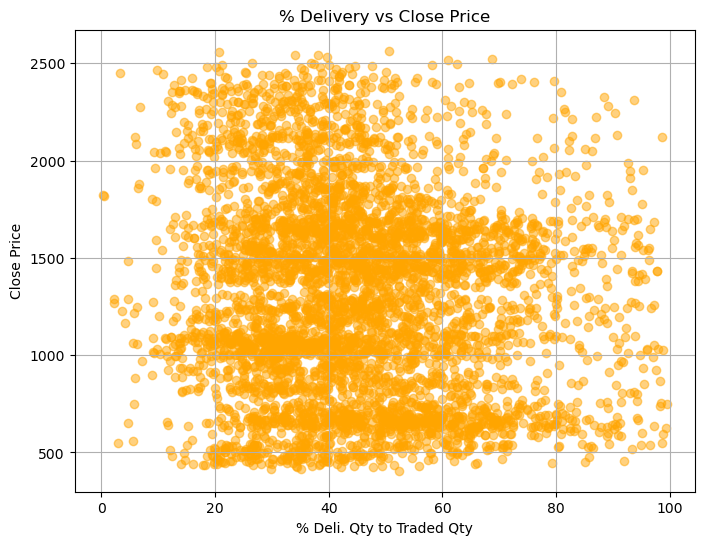

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(df['% Deli. Qty to Traded Qty'], df['Close Price'], alpha=0.5, color='orange')
plt.title('% Delivery vs Close Price')
plt.xlabel('% Deli. Qty to Traded Qty')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# looks like no relation, because there is no spacific pattern we can identify here